In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import datetime as dt
from sklearn import metrics
from sklearn.svm import SVC

In [38]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
#default is rbf
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [6]:
svm.score(X_train, y_train)

0.9897523809523809

In [7]:
svm.score(X_test, y_test)

0.9781714285714286

In [8]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
svm_linear.score(X_train, y_train)

0.9735047619047619

In [10]:
svm_linear.score(X_test, y_test)

0.9364

In [11]:
parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy', n_jobs=-1)

# fit
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [18]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,374.570876,1.650748,154.894381,4.222607,1,0.01,"{'C': 1, 'gamma': 0.01}",0.974095,0.973810,0.974476,0.972857,0.971429,0.973333,0.001093,3
1,677.636294,6.953214,262.448997,5.327606,1,0.001,"{'C': 1, 'gamma': 0.001}",0.932095,0.934095,0.933524,0.931333,0.934762,0.933162,0.001268,7
2,1712.899585,12.899633,471.481417,2.183637,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.895524,0.903905,0.900857,0.895905,0.900571,0.899352,0.003194,9
3,307.962183,2.555341,142.075085,0.843398,10,0.01,"{'C': 10, 'gamma': 0.01}",0.981429,0.980762,0.981048,0.980667,0.979429,0.980667,0.000673,1
4,340.614739,2.971733,157.996262,3.372994,10,0.001,"{'C': 10, 'gamma': 0.001}",0.952762,0.953238,0.954571,0.951143,0.953048,0.952952,0.001098,5
5,662.164874,3.653545,263.643104,2.424143,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.927714,0.930190,0.928857,0.928000,0.930762,0.929105,0.001195,8
6,303.556603,1.958016,144.124278,2.038303,100,0.01,"{'C': 100, 'gamma': 0.01}",0.981143,0.980286,0.980857,0.980286,0.979333,0.980381,0.000620,2
7,270.338161,3.349973,124.364252,1.424252,100,0.001,"{'C': 100, 'gamma': 0.001}",0.968381,0.965619,0.966095,0.966762,0.963333,0.966038,0.001644,4
8,321.028399,28.618798,136.432775,24.470960,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.941048,0.943619,0.944190,0.940762,0.943429,0.942610,0.001417,6


In [148]:
start_time = dt.datetime.now()
predictions = clf.predict(X_test)
elapsed_time = dt.datetime.now() - start_time
print('Prediction takes {}'.format(str(elapsed_time)))

Prediction takes 0:03:15.258861


In [21]:
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9816571428571429


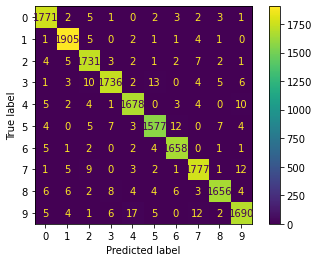

In [26]:
cm = confusion_matrix(y_test, predictions, labels=['0','1','2','3','4','5','6','7','8','9'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [41]:
X_train.shape[0]

52500

In [138]:
colors_d = {'0': 'red','1': 'blue','2':'green','3': 'orange','4': 'fuchsia','5':'pink','6':'brown','7':'dimgray','8':'aqua','9':'lime'}
colors = [colors_d[i] for i in y_train]

In [144]:
pca = PCA(n_components=8).fit(X_train)

X_pca = pca.transform(X_train)

plt.figure(figsize=(12, 5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

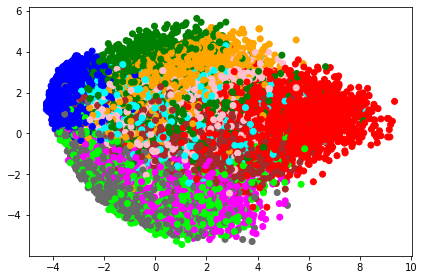

In [145]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)

plt.tight_layout()
plt.show()

In [128]:
def random_digit():
    rand_idx = np.random.choice(X_test.shape[0],1)
    images_and_labels = list(zip(X_test[rand_idx], y_test[rand_idx]))
    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
            plt.subplot(np.ceil(1/6.0), 6, index + 1)
            plt.axis('off')
            plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.title("Predicted {}".format(label))
    plt.show()

/home/pt18419/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


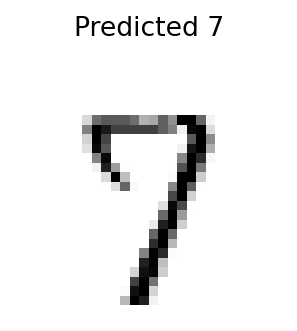

In [132]:
random_digit()